## Load Dataset and important Libraries


In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
import re
import nltk
import joblib
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score,roc_curve, roc_auc_score
import joblib
from scipy.sparse import hstack


In [ ]:
#  loading datset
df_Real=pd.read_csv('True.csv')
df_fake=pd.read_csv('Fake.csv')

In [8]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [9]:
df_Real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [10]:
# Summary of df_fake summarry
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [11]:
# Summary of df_Real summarry
df_Real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [12]:
# Checking for duplicates before merging
df_Real.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
21412    False
21413    False
21414    False
21415    False
21416    False
Length: 21417, dtype: bool

In [13]:
# Checking for duplicates before merging
df_fake.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
23476    False
23477    False
23478    False
23479    False
23480    False
Length: 23481, dtype: bool

## Data Preprocessing

In [14]:
# creating a column in each dataset in which assign a 0 value for fake and 1 value for real news before merging through which we can easily recognize the data as a fake or real

df_fake['label'] = 0  # 0 for FAKE
df_Real['label'] = 1  # 1 for REAL


In [15]:
# Combine both into one DataFrame
df = pd.concat([df_fake, df_Real], axis=0)
# Shuffle the data to mix fake and real news
df_combined = df.sample(frac=1, random_state=42).reset_index(drop=True)
# df.to_save_csv('')
print(df.shape)
print(df['subject'].value_counts())
df.head()


(44898, 5)
subject
politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: count, dtype: int64


,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [16]:
# after merging check for duplicates
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
21412    False
21413    False
21414    False
21415    False
21416    False
Length: 44898, dtype: bool

In [17]:
# Check for null values in main dataframe df
df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [18]:
# see the name of columns
df.columns

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')

In [19]:
# Capitalizing the first character of column name
df.columns = df.columns.str.title()
df.columns

Index(['Title', 'Text', 'Subject', 'Date', 'Label'], dtype='object')

In [20]:
# if there is some duplicates
df=df.drop_duplicates()

In [22]:
# special characters remove, make a clear format using title, white reomve
df['Title'] = df['Title'].str.replace(r"[^a-zA-Z\s]", "", regex = True)
df['Text'] = df['Text'].str.replace(r"[^a-zA-Z\s]", "", regex = True)
# special characters remove, make a clear format using title, white reomve
df['Text'] = df['Text'].str.replace(r"[^a-zA-Z\s]", "", regex = True).str.title().str.strip()
df["Title"].head


<bound method NDFrame.head of 0         Donald Trump Sends Out Embarrassing New Years...
1         Drunk Bragging Trump Staffer Started Russian ...
2         Sheriff David Clarke Becomes An Internet Joke...
3         Trump Is So Obsessed He Even Has Obamas Name ...
4         Pope Francis Just Called Out Donald Trump Dur...
                               ...                        
21412    Fully committed NATO backs new US approach on ...
21413    LexisNexis withdrew two products from Chinese ...
21414    Minsk cultural hub becomes haven from authorities
21415    Vatican upbeat on possibility of Pope Francis ...
21416      Indonesia to buy  billion worth of Russian jets
Name: Title, Length: 44689, dtype: object>

In [24]:
# Lower case the text
df['Text'] = df['Text'].astype(str).str.strip().str.lower()
df['Title'] = df['Title'].astype(str).str.strip().str.lower()

In [25]:
# The column subject and Date does not add any value in training model so we reomve them
df=df.drop("Subject",axis=1)

In [26]:
df=df.drop("Date",axis=1)

## Tokenize the Text and removing Stopwords

In [ ]:
# 	Removing stopwords
# first get english stopwords
stop_words = set(stopwords.words('english'))
# Tokenize the text
# Tokenize each row of the 'text' column

df['tokens'] = df['Text'].apply(word_tokenize)

df['tokens'] = df['tokens'].apply(lambda token_list: [word for word in token_list if word.isalpha() and word not in stop_words])


## Apply Limmitization

In [29]:
# initialize the limmitizer 
lemmatizer = WordNetLemmatizer()


In [30]:
# lemmatize the text

df['tokens'] = df['tokens'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])

In [32]:
tokens=df['tokens']

In [ ]:


#  Convert NLTK POS tag to WordNet POS
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return 'a'  # adjective
    elif tag.startswith('V'):
        return 'v'  # verb
    elif tag.startswith('N'):
        return 'n'  # noun
    elif tag.startswith('R'):
        return 'r'  # adverb
    else:
        return 'n'  # default to noun

# Lemmatize tokens with POS tagging
def lemmatize_with_pos(tokens):
    tagged = pos_tag(tokens)
    lemmatized = []
    for word, tag in tagged:
        if word.lower() in ['is', 'am', 'are']:
            lemmatized.append(word)
        else:
            lemmatized.append(lemmatizer.lemmatize(word, get_wordnet_pos(tag)))
    return lemmatized


In [ ]:
# applyin pos_lemmatization for effecient lemmatizing
df['lemmatized'] = df['tokens'].apply(lemmatize_with_pos)


## EDA

C:\Users\As\AppData\Local\Temp\ipykernel_10824\2841686233.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Label', palette='Set2')


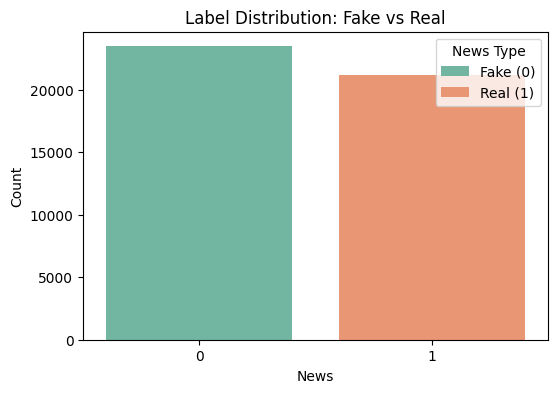

In [36]:
# Visualizing label distribution (Fake vs Real)
plt.figure(figsize=(6, 4))

# Plot
ax = sns.countplot(data=df, x='Label', palette='Set2')

# Set axis labels and title
plt.title('Label Distribution: Fake vs Real')
plt.xlabel('News')
plt.ylabel('Count')

# Custom legend: manually map values
legend_labels = ['Fake (0)', 'Real (1)']
handles = ax.patches
ax.legend(handles=handles, labels=legend_labels, title='News Type')

plt.show()


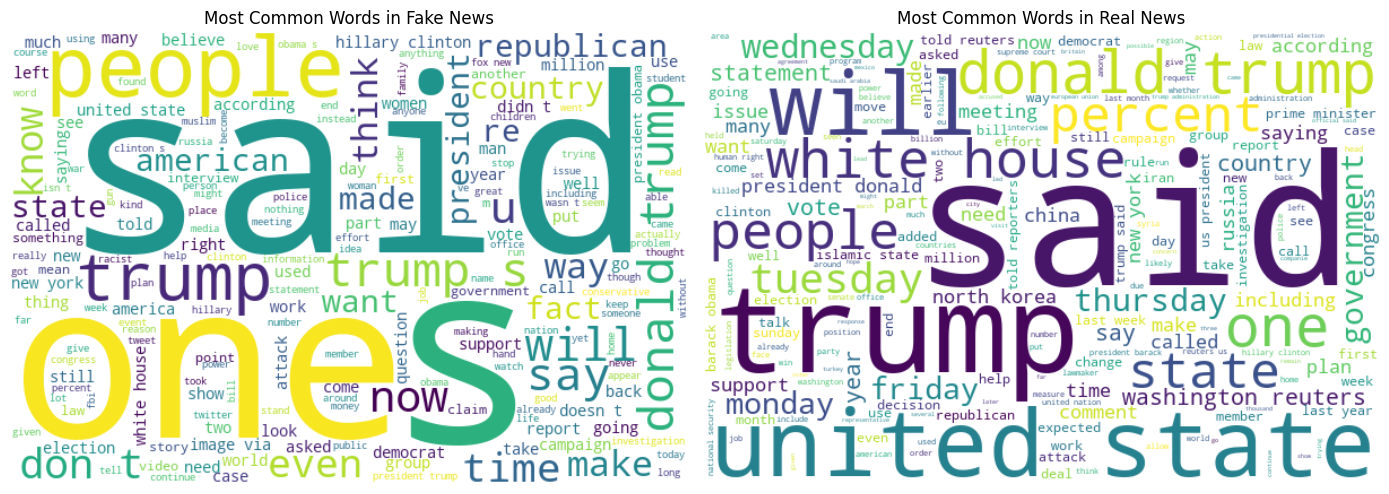

In [37]:
# If Label is 0 = Fake, 1 = Real
fake_words = ' '.join(df[df['Label'] == 0]['Text'].dropna().astype(str))
real_words = ' '.join(df[df['Label'] == 1]['Text'].dropna().astype(str))

plt.figure(figsize=(14, 6))

# Fake news word cloud
plt.subplot(1, 2, 1)
wc_fake = WordCloud(width=600, height=400, background_color='white').generate(fake_words)
plt.imshow(wc_fake, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Fake News")

# Real news word cloud
plt.subplot(1, 2, 2)
wc_real = WordCloud(width=600, height=400, background_color='white').generate(real_words)
plt.imshow(wc_real, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Real News")

plt.tight_layout()
plt.show()


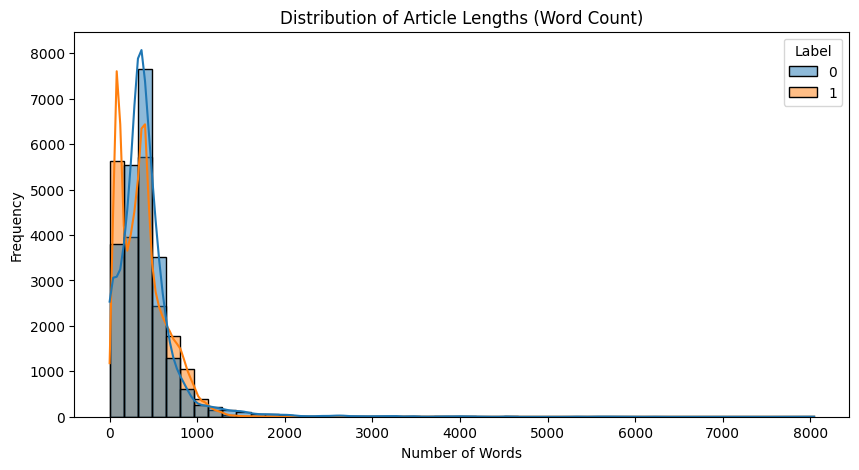

In [38]:
df['text_length'] = df['Text'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='text_length', hue='Label', bins=50, kde=True)
plt.title('Distribution of Article Lengths (Word Count)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()



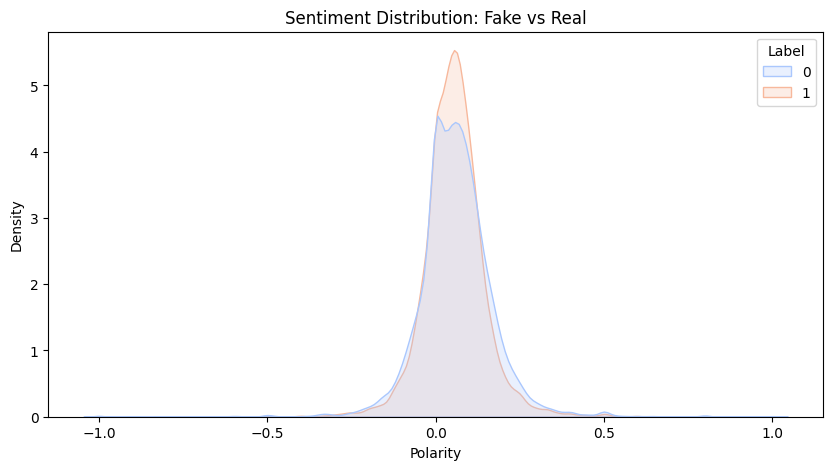

In [39]:
# Sentiment Analysis
def get_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity

df['sentiment'] = df['Text'].apply(get_sentiment)

plt.figure(figsize=(10,5))
sns.kdeplot(data=df, x='sentiment', hue='Label', fill=True, common_norm=False, palette='coolwarm')
plt.title('Sentiment Distribution: Fake vs Real')
plt.xlabel('Polarity')
plt.ylabel('Density')
plt.show()


## Feature Extraction

In [40]:
#  TfidfVectorizer will not work directly — because it expects strings, not lists.
df['lemmatized_text'] = df['lemmatized'].apply(lambda tokens: ' '.join(tokens))


In [41]:
# then apply TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['lemmatized_text'])


## Model Training

In [42]:

# Defining Data for Model training
X=tfidf_matrix
Y=df['Label']

In [ ]:
# Splitting data for training and testing
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=42,test_size=0.2)

In [ ]:
# initializing Model
model=LogisticRegression()

In [ ]:
# train the model through data
model.fit(x_train,y_train)

LogisticRegression()

In [1]:
# store the predicted result
y_pred=model.predict(x_test)

NameError: name 'model' is not defined

In [ ]:
#check for after and before accuracy of model training

# Training accuracy
train_preds = model.predict(x_train)
train_accuracy = accuracy_score(y_train, train_preds)

# Test accuracy
test_preds = model.predict(x_test)
test_accuracy = accuracy_score(y_test, test_preds)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Training Accuracy: 0.9921121087522027
Test Accuracy: 0.9878048780487805


<BarContainer object of 8938 artists>

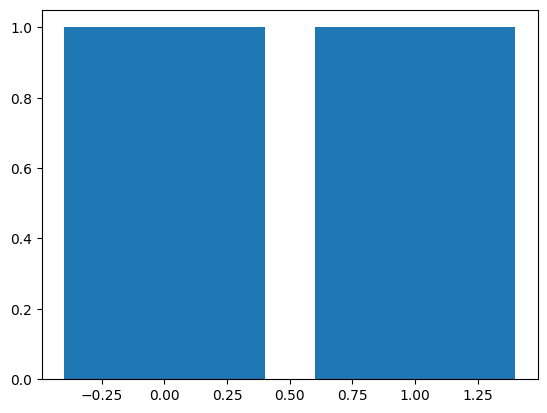

In [ ]:
# ploting the graph for see the presicte and actual result
plt.bar(y_pred,y_test)

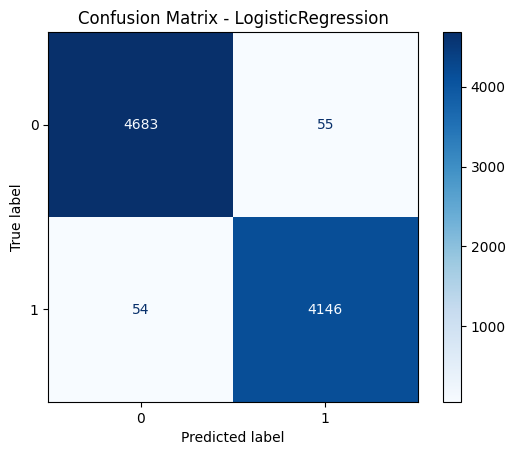

In [ ]:
# Confusion Matrix
ac=accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - LogisticRegression")
plt.show()

In [52]:
#  we find all evaluates with Classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9878048780487805
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4738
           1       0.99      0.99      0.99      4200

    accuracy                           0.99      8938
   macro avg       0.99      0.99      0.99      8938
weighted avg       0.99      0.99      0.99      8938



## 2nd Model MultinomialNB

In [53]:
# Initialize the model
modeel = MultinomialNB()

In [54]:
# train the model
modeel.fit(x_train,y_train)

MultinomialNB()

In [ ]:

y_preed=modeel.predict(x_test)

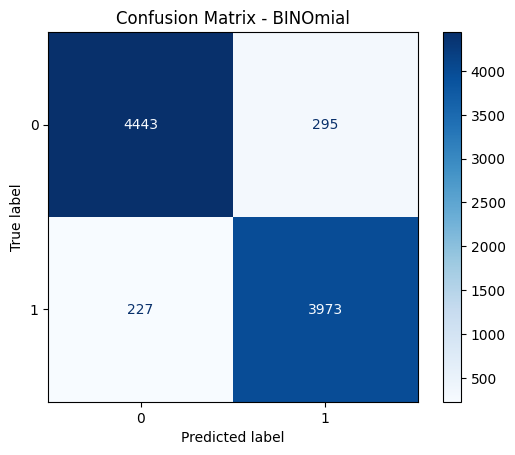

In [ ]:
# Confusion Matrix
ac=accuracy_score(y_test,y_preed)
cm = confusion_matrix(y_test, y_preed)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modeel.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - BINOmial")
plt.show()

In [57]:
# acfrom sklearn.metrics import accuracy_score

# Training accuracy
train_preds = modeel.predict(x_train)
train_accuracy = accuracy_score(y_train, train_preds)

# Test accuracy
test_preds = modeel.predict(x_test)
test_accuracy = accuracy_score(y_test, test_preds)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Training Accuracy: 0.9491762468182708
Test Accuracy: 0.9415976728574625


In [58]:
#  we find all evaluates with Classification report
print("Classification Report:\n", classification_report(y_test, y_preed))

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      4738
           1       0.93      0.95      0.94      4200

    accuracy                           0.94      8938
   macro avg       0.94      0.94      0.94      8938
weighted avg       0.94      0.94      0.94      8938



## ROC of LogisticRegression

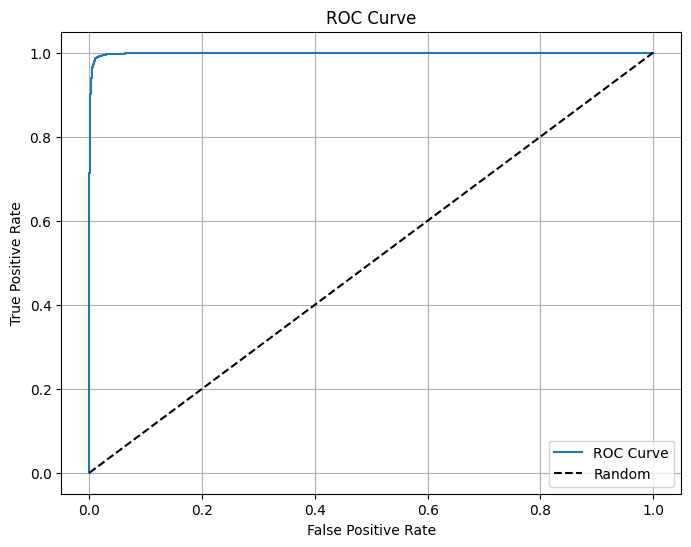

AUC Score: 0.9989


In [59]:


# Get predicted probabilities
y_prob = model.predict_proba(x_test)[:, 1]  # Probability for class 1

# Get ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot the ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0,1], [0,1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

# AUC Score
auc = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc:.4f}")


    ## ROC curve of BiNomial

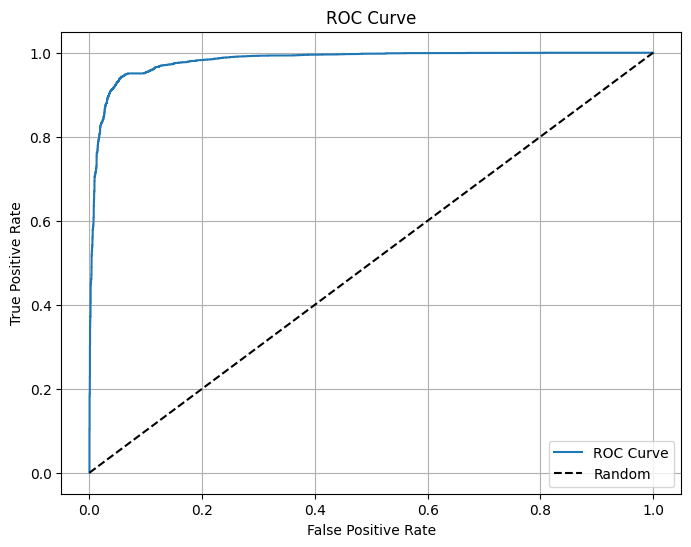

AUC Score: 0.9819


In [60]:


# Get predicted probabilities
y_prob = modeel.predict_proba(x_test)[:, 1]  # Probability for class 1

# Get ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot the ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0,1], [0,1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

# AUC Score
auc = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc:.4f}")


## For Streamlit prediction

In [ ]:


#  Fit vectorizer
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(df['lemmatized_text'])

#  Combine TF-IDF + extra features
X_extra = df[['sentiment', 'text_length']].values
X_combined = hstack([X_tfidf, X_extra])

#  Train model
model = LogisticRegression()
model.fit(X_combined, df['Label'])

#  Save model and vectorizer
joblib.dump(model, "model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")


c:\Users\As\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['vectorizer.pkl']